In [4]:
pip install tensorflow numpy matplotlib pillow

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
# Set your data directory
data_dir = "C:/Users/Lahiru/OneDrive - University of Jaffna/Desktop/Research 2020.10.09/Road signal detection/Road-signal-detection-R1/Road signal detection.v1i.yolov11"

# Create an ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Load training data
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Get the number of classes
num_classes = len(train_generator.class_indices)

Found 234 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [10]:
# Load the pre-trained MobileNetV3Small model without the top layers
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
epochs = 100
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 15s 916ms/step - accuracy: 0.9386 - loss: 0.3333 - val_accuracy: 0.9062 - val_loss: 0.3316
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8750 - loss: 0.4691 - val_accuracy: 0.9615 - val_loss: 0.2291
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 472ms/step - accuracy: 0.9676 - loss: 0.2151
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8125 - loss: 0.5417 - val_accuracy: 0.9062 - val_loss: 0.3315
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 514ms/step - accuracy: 0.9110 - loss: 0.3504 - val_accuracy: 0.9615 - val_loss: 0.2362
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9375 - loss: 0.2555 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 837ms/step - accuracy: 0.9188 - loss: 0.3341 - val_accuracy: 0.9375 - val_loss: 0.2884
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9375 - loss: 0.2558 - val_accuracy: 0.9231 - val_loss: 0.2841
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.9306 

In [26]:
# Unfreeze the last few layers
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Continue training
history_fine = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9441 - loss: 0.2044 - val_accuracy: 0.9375 - val_loss: 0.3075
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8438 - loss: 0.3439 - val_accuracy: 0.9231 - val_loss: 0.2878
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 747ms/step - accuracy: 0.9531 - loss: 0.1807
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - accuracy: 0.9688 - loss: 0.1285 - val_accuracy: 0.9375 - val_loss: 0.3100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 685ms/step - accuracy: 0.9266 - loss: 0.1843 - val_accuracy: 0.9231 - val_loss: 0.2908
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9375 - loss: 0.2236 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 807ms/step - accuracy: 0.9340 - loss: 0.1810 - val_accuracy: 0.9062 - val_loss: 0.3723
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 1.0000 - loss: 0.0724 - val_accuracy: 0.9615 - val_loss: 0.2079
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.9283 - 

In [27]:
evaluation = model.evaluate(validation_generator)
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 425ms/step - accuracy: 0.9332 - loss: 0.2712
Validation Loss: 0.2867104113101959
Validation Accuracy: 0.931034505367279


In [28]:
model.save('road_signal_detection_model.h5')

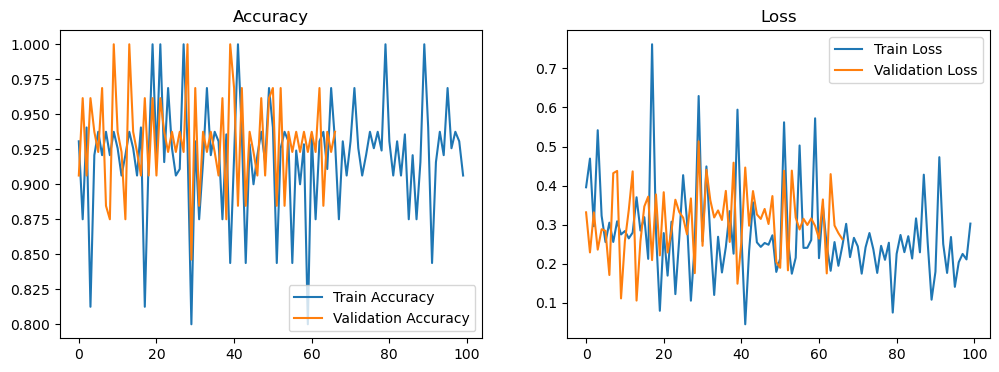

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

In [30]:
model.save('road_signal_detection_model.keras', save_format='tf')

In [31]:
import cv2
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the trained model
model = tf.keras.models.load_model('road_signal_detection_model.keras')

# Define class names (replace with your actual class names)
class_names = ['Yellowboard', 'Blueboard', 'Crossing']

# Function to preprocess the frame
def preprocess_frame(frame):
    # Resize the frame to match the input size of your model
    img = cv2.resize(frame, (224, 224))
    img = Image.fromarray(img)
    img = np.array(img) / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# Function to get prediction
def get_prediction(frame):
    processed_frame = preprocess_frame(frame)
    prediction = model.predict(processed_frame)
    class_index = np.argmax(prediction[0])
    confidence = prediction[0][class_index]
    return class_names[class_index], confidence

# Initialize the camera
cap = cv2.VideoCapture(0)  # 0 is usually the default camera

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    
    if not ret:
        print("Failed to grab frame")
        break

    # Get prediction
    predicted_class, confidence = get_prediction(frame)

    # Add text to the frame
    text = f"{predicted_class}: {confidence:.2f}"
    cv2.putText(frame, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Road Signal Detection', frame)

    # Break the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━